# Title: Performance of Deep Learning Model in Sentiment Analysis of Tamil Movie Reviews as compared to English Movie Reviews

#### Group Member Names : Akshay Ashok Netalkar & Bharath Vyas Lakshmi Narayanan



### INTRODUCTION:
*********************************************************************************************************************
#### AIM : 
To analyse the success and accuracy of the paper: 'Title: DravidianCodeMix: Sentiment Analysis and Offensive Language Identification Dataset for Dravidian Languages in Code-Mixed Text' released in 17th Jun '21.

*********************************************************************************************************************
#### Github Repo: 
https://github.com/bharathichezhiyan/DravidianCodeMix-Dataset

*********************************************************************************************************************
#### DESCRIPTION OF PAPER: 
The paper discusses the creation of a multilingual dataset for sentiment analysis and offensive language identification, comprising over 60,000 social media comments from under-resourced Dravidian languages. The dataset includes comments from Tamil-English, Kannada-English, and Malayalam-English, manually annotated by volunteers, exhibiting diverse code-mixing phenomena and achieving high inter-annotator agreement. The study also presents baseline experiments using machine learning techniques to establish benchmarks on this dataset.

*********************************************************************************************************************
#### PROBLEM STATEMENT : 
i. Using the code available in GitHub and try to replicate the results from the original dataset.
ii. Fetch a different dataset and see if the model works fine. Change model parameters according to the new dataset wherever necessary.
iii. Compare the performances amongst the 2 outputs and check the consistency of the model.

*********************************************************************************************************************
#### CONTEXT OF THE PROBLEM:

There are challenges whilst doing sentiment analysis on regional languages. Scarcity of labeled data is one among them. This manually tagged data helps us find out the effectiveness of model on regional languages where there are limitations in removal of stop words etc. Hence, we have decided to run the model as is with the orginal data and bring in a new set of labeled data but in english to completely check the readiness of models for smaller languages. We had treated the new dataset with similar kind of treatment as the original dataset as we did not want special treatment of any kind. 

*********************************************************************************************************************
#### SOLUTION:
The proposed model in the paper has lesser accuracy as compared to the standard maintained. Hence, we went ahead with the new dataset which was in english as opposed to Tamil. WHen we had run the model, we got substantially higher accuracy as compared to the original data (obviously changed parameters accordingly). 
As expected, we have found that the model had performed much better with English as compared to Tamil. Hence, we can safely state that the model used is not built for regional languages as shown by the results.


# Background
*********************************************************************************************************************

#### In this paper we have divided our 'Related Work' into 3 parts :

#### Replicate code with original dataset

|Reference|Explanation|Dataset/Input|Weakness|
|------|------|------|------|
|B. Lakshmi Narayanan[1]| Using the code available in GitHub and try to replicate the results from the original dataset | https://github.com/bharathichezhiyan/DravidianCodeMix-Dataset/blob/main/DravidianCodeMix-2020.zip | Lesser scope for pre-text processing steps |

*********************************************************************************************************************
#### Running same model with different dataset:

|Reference|Explanation|Dataset/Input|Weakness|
|------|------|------|------|
|A. K. Netalkar [2]|Fetch a different dataset and see if the model works fine. Change model parameters according to the new dataset wherever necessary.| Dataset of IMDB reviews with sentiment | Mismatch in the number of classes as compared to the orignal |

*********************************************************************************************************************


#### Performance Evaluation:

| Reference |Explanation |  Dataset/Input |Weakness|
| --- | --- | --- | --- |
|A. K. Netalkar [2] | Compare the performances amongst the 2 outputs |-| Inflexible Layer Connections |
|B. Lakshmi Narayanan[1]|check the consistency of the model|-|-Nil-|

*********************************************************************************************************************






# Implement paper code :
*********************************************************************************************************************

* 



In [83]:
!pip install keras.utils
!pip install keras
!pip install tensorflow
!pip install --upgrade keras tensorflow
!pip install np_utils

In [162]:
import numpy as np 
import pandas as pd
import re
import gc
import os
import fileinput
import string
import tensorflow as tf
import zipfile
import datetime
import sys
from tqdm  import tqdm
tqdm.pandas()
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, Embedding
from sklearn.metrics import classification_report
# from keras.utils import np_utils
# from tensorflow.keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer

In [163]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [164]:
def detect(tokens):
    return [t for t in tokens if t in valid_forms]
    
def replace_blank(tokens):
    return [blank if t in valid_forms else t for t in tokens]

def create_windows(tokens, window_size=3):
    X = []
    for i, word in enumerate(tokens):
        if word == blank:
            window = tokens[i-window_size:i] + tokens[i+1:i+window_size+1]
            window = ' '.join(window)
            X.append(window)    
    return X

In [165]:
df = pd.read_csv('/Users/vyaslakshminarayan/Downloads/Tamil_first_ready_for_sentiment.csv',sep='\t',names=['category','text'])
print(df.shape)

df['text'] = df.text.str.lower().str.replace(r'['+string.digits+string.punctuation+']', ' ')
df['text'] = df['text'].apply(lambda x: x.split())

(15744, 2)


/var/folders/zx/ltm27tv95_b5m4tx3kvhbksm0000gn/T/ipykernel_84592/2212797927.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df.text.str.lower().str.replace(r'['+string.digits+string.punctuation+']', ' ')


In [166]:
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(df['text'].tolist(), y, random_state=5, test_size=0.2)

class_labels = np.unique(y_train)
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = class_labels,
                                        y = y_train                                                    
                                    )
class_weight_dict = dict(zip(class_labels, class_weights))

print(class_weight_dict)

{'Mixed feelings ': 1.7689606741573034, 'Negative ': 1.5616862988220708, 'Positive ': 0.2969118340405469, 'not-Tamil ': 6.345088161209068, 'unknown state ': 3.7208271787296896}


In [167]:
y=df['category']
# y = pd.get_dummies(df['category']).values

X_train, X_test, y_train, y_test = train_test_split(df['text'].tolist(), y, random_state=5, test_size=0.2)
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

X_train

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
y_train=pd.get_dummies(y_train).values
y_test=pd.get_dummies(y_test).values
diz_label = {}
for i,label in enumerate(df.category.factorize()[1]):
    diz_label[i] = label
    
diz_label

{0: 'Negative ',
 1: 'Positive ',
 2: 'Mixed feelings ',
 3: 'not-Tamil ',
 4: 'unknown state '}

In [168]:
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(sequences, maxlen=50)
sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sequences, maxlen=50)

In [169]:
model = Sequential()
model.add(Embedding(20000, 100, input_length=50))
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(5, activation='softmax'))

In [170]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [171]:
class_weight_dict = dict(enumerate(class_weights))

model.fit(X_train, y_train,
          batch_size=1024,
          epochs=10,
          verbose=1,
          validation_split=0.1,
          class_weight=class_weight_dict)

Epoch 1/10
12/12 [==============================] - 2s 144ms/step - loss: 1.6136 - accuracy: 0.2705 - val_loss: 1.6195 - val_accuracy: 0.1238
Epoch 2/10
12/12 [==============================] - 2s 151ms/step - loss: 1.5879 - accuracy: 0.1502 - val_loss: 1.5772 - val_accuracy: 0.4286
Epoch 3/10
12/12 [==============================] - 2s 127ms/step - loss: 1.4513 - accuracy: 0.3352 - val_loss: 1.5014 - val_accuracy: 0.3270
Epoch 4/10
12/12 [==============================] - 2s 186ms/step - loss: 1.2396 - accuracy: 0.4846 - val_loss: 1.4099 - val_accuracy: 0.3317
Epoch 5/10
12/12 [==============================] - 2s 133ms/step - loss: 1.0973 - accuracy: 0.4217 - val_loss: 1.2154 - val_accuracy: 0.5278
Epoch 6/10
12/12 [==============================] - 2s 129ms/step - loss: 0.9030 - accuracy: 0.6271 - val_loss: 1.1454 - val_accuracy: 0.5595
Epoch 7/10
12/12 [==============================] - 2s 134ms/step - loss: 0.6934 - accuracy: 0.7060 - val_loss: 1.1167 - val_accuracy: 0.5659
Epoch 

In [172]:
score = model.evaluate(X_test, y_test,
                       batch_size=256, verbose=1)
print('Test accuracy:', score[1])

13/13 [==============================] - 0s 21ms/step - loss: 1.3236 - accuracy: 0.5399
Test accuracy: 0.5398539304733276


In [173]:
preds = model.predict(X_test)

99/99 [==============================] - 1s 4ms/step


0: 'Negative ',
1: 'Positive ',
2: 'Mixed feelings ',
3: 'not-Tamil ',
4: 'unknown state '

In [174]:
print(classification_report(np.argmax(y_test,axis=1),np.argmax(preds,axis=1)))

              precision    recall  f1-score   support

           0       0.16      0.21      0.18       377
           1       0.28      0.29      0.29       424
           2       0.77      0.66      0.71      2075
           3       0.56      0.62      0.59       100
           4       0.22      0.38      0.27       173

    accuracy                           0.54      3149
   macro avg       0.40      0.43      0.41      3149
weighted avg       0.59      0.54      0.56      3149



In [175]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
plt.show()

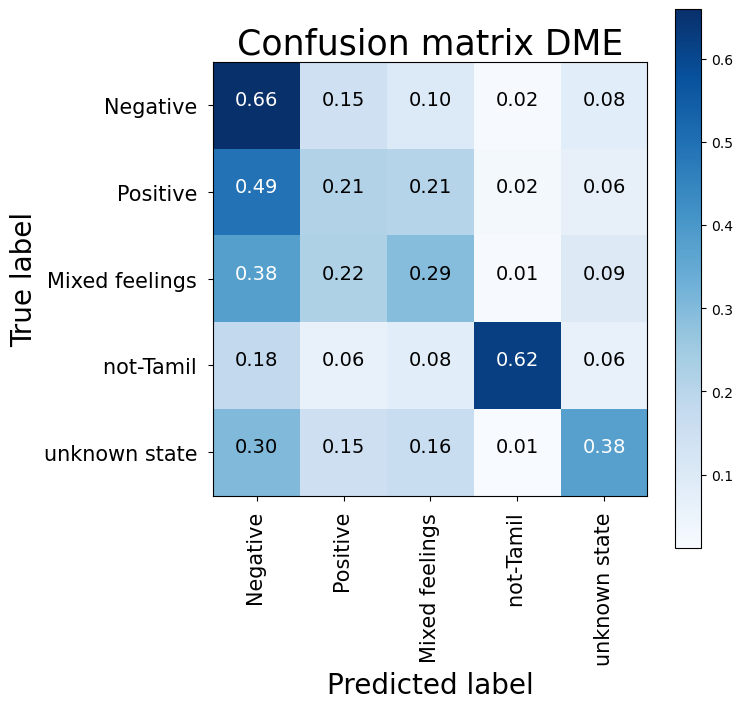

In [176]:
cnf_matrix = confusion_matrix([diz_label[i] for i in np.argmax(y_test, axis=1)], 
                              [diz_label[i] for i in np.argmax(preds, axis=1)])

plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=list(diz_label.values()), title="Confusion matrix DME")
plt.show()

*********************************************************************************************************************
### Contribution  Code :

We have brought in a new dataset which is in english (IMDB Dataset).

In [177]:
!pip install keras.utils
!pip install keras
!pip install tensorflow
!pip install --upgrade keras tensorflow
!pip install np_utils

In [178]:
import numpy as np 
import pandas as pd
import re
import gc
import os
import fileinput
import string
import tensorflow as tf
import zipfile
import datetime
import sys
from tqdm  import tqdm
tqdm.pandas()
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, Embedding
from sklearn.metrics import classification_report
# from keras.utils import np_utils
# from tensorflow.keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
from sklearn.utils.class_weight import compute_class_weight

In [179]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [180]:
def detect(tokens):
    return [t for t in tokens if t in valid_forms]
    
def replace_blank(tokens):
    return [blank if t in valid_forms else t for t in tokens]

def create_windows(tokens, window_size=3):
    X = []
    for i, word in enumerate(tokens):
        if word == blank:
            window = tokens[i-window_size:i] + tokens[i+1:i+window_size+1]
            window = ' '.join(window)
            X.append(window)    
    return X

In [181]:
df = pd.read_csv('/Users/vyaslakshminarayan/Downloads/IMDB Dataset.csv')
print(df.shape)

df.head()

new_column_names = {'review': 'text', 'sentiment': 'category'}
df.rename(columns=new_column_names, inplace=True)

df['text'] = df.text.str.lower().str.replace(r'['+string.digits+string.punctuation+']', ' ')
df['text'] = df['text'].apply(lambda x: x.split())


(50000, 2)


/var/folders/zx/ltm27tv95_b5m4tx3kvhbksm0000gn/T/ipykernel_84592/3410473748.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df.text.str.lower().str.replace(r'['+string.digits+string.punctuation+']', ' ')


In [182]:
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(df['text'].tolist(), y, random_state=5, test_size=0.2)

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'negative': 0.9950248756218906, 'positive': 1.0050251256281406}

In [183]:
y=df['category']
# y = pd.get_dummies(df['category']).values

X_train, X_test, y_train, y_test = train_test_split(df['text'].tolist(), y, random_state=5, test_size=0.2)
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

X_train

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
y_train=pd.get_dummies(y_train).values
y_test=pd.get_dummies(y_test).values
diz_label = {}
for i,label in enumerate(df.category.factorize()[1]):
    diz_label[i] = label
    
diz_label

{0: 'positive', 1: 'negative'}

In [184]:
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(sequences, maxlen=50)
sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sequences, maxlen=50)

In [185]:
model = Sequential()
model.add(Embedding(20000, 100, input_length=50))
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(2, activation='softmax'))

In [186]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [187]:
class_weight_dict = dict(enumerate(class_weights))

model.fit(X_train, y_train,
          batch_size=1024,
          epochs=10,
          verbose=1,
          validation_split=0.1,
          class_weight=class_weight_dict)

Epoch 1/10
36/36 [==============================] - 6s 143ms/step - loss: 0.6142 - accuracy: 0.6566 - val_loss: 0.4558 - val_accuracy: 0.7803
Epoch 2/10
36/36 [==============================] - 5s 149ms/step - loss: 0.3783 - accuracy: 0.8318 - val_loss: 0.4002 - val_accuracy: 0.8198
Epoch 3/10
36/36 [==============================] - 5s 145ms/step - loss: 0.2870 - accuracy: 0.8805 - val_loss: 0.4430 - val_accuracy: 0.8100
Epoch 4/10
36/36 [==============================] - 5s 140ms/step - loss: 0.2352 - accuracy: 0.9050 - val_loss: 0.4369 - val_accuracy: 0.8117
Epoch 5/10
36/36 [==============================] - 5s 137ms/step - loss: 0.1882 - accuracy: 0.9276 - val_loss: 0.4998 - val_accuracy: 0.8045
Epoch 6/10
36/36 [==============================] - 5s 143ms/step - loss: 0.1509 - accuracy: 0.9441 - val_loss: 0.5497 - val_accuracy: 0.8027
Epoch 7/10
36/36 [==============================] - 5s 143ms/step - loss: 0.1169 - accuracy: 0.9582 - val_loss: 0.6261 - val_accuracy: 0.7990
Epoch 

In [188]:
score = model.evaluate(X_test, y_test,
                       batch_size=256, verbose=1)
print('Test accuracy:', score[1])

40/40 [==============================] - 1s 16ms/step - loss: 1.0160 - accuracy: 0.7828
Test accuracy: 0.782800018787384


In [189]:
preds = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


0: 'Negative ',
1: 'Positive '

In [190]:
print(classification_report(np.argmax(y_test,axis=1),np.argmax(preds,axis=1)))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      4900
           1       0.81      0.75      0.78      5100

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



In [191]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

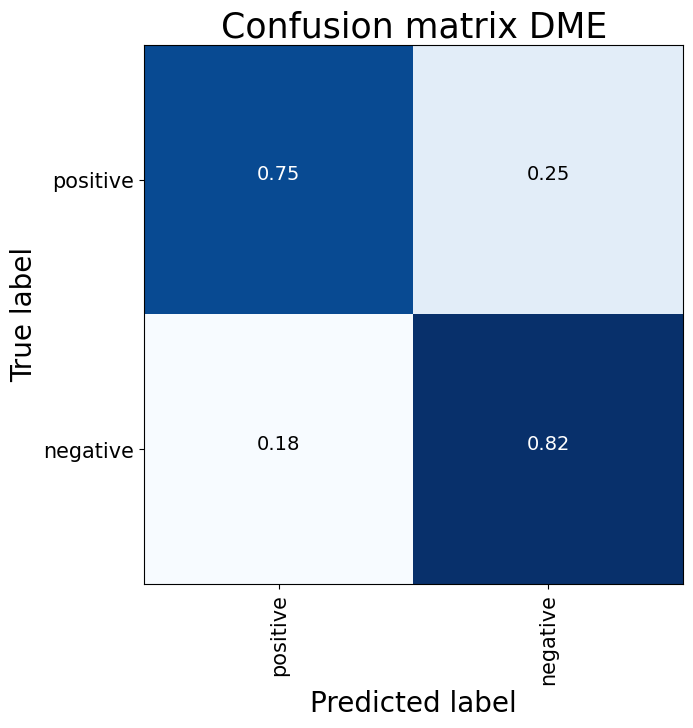

In [192]:
cnf_matrix = confusion_matrix([diz_label[i] for i in np.argmax(y_test, axis=1)], 
                              [diz_label[i] for i in np.argmax(preds, axis=1)])

plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=list(diz_label.values()), title="Confusion matrix DME")
plt.show()

### Results :
*******************************************************************************************************************************

Original Data (Regional Language):

Accuracy: 0.54

New Data (English):

Accuracy: 0.78

#### Observations :
*******************************************************************************************************************************

The accuracy of English dataset (New data) is substantially higher as compared to Original Data (Tamil Language)


### Conclusion and Future Direction :
*******************************************************************************************************************************
### Learning:

We gained many valuable insights and lessons from this project:

Data Set Challenges: Handling local language data sets presents unique challenges, such as missing labeled data and code-mixing phenomena, that must be addressed for successful sensitivity analysis


Multilingual sampling applications: Sentiment analysis sampling applications can vary significantly between regional languages and widely spoken languages such as English. This highlights the importance of language-specific sampling.

Analysis replication: Replication of analytical results requires careful attention to detail with respect to preprocessing, model architecture, and hyperparameters. Small differences can lead to different results.


Dataset consistency: The internal consistency of the dataset is important for accurate model analysis. Inconsistencies in the number of studies or data distribution can affect the performance of the model.


Basics are important: Baseline performance using machine learning techniques and evaluating the efficiency of advanced models helps identify patterns


### Results Discussion:

Our results provided interesting insights into how the sensitivity analysis model works on different data sets.

Original data (regional language): The sensitivity analysis model applied to the original data set revealed an accuracy of 0.54. This relatively low accuracy may be attributed to the difficulties of sensory analysis in code-mixed regional languages.


Additional data (English): When the same model was applied to a different dataset containing English movie reviews, accuracy improved significantly by 0.78. These results suggest that the model performs well in widely spoken languages such as English.


### Limitations:

Dataset Bias: Both the original and new datasets might have biases due to the sources of data collection and annotator subjectivity. These biases can impact the model's generalizability.


Dataset Variance: The variance in language structure and sentiment expression across languages can affect model performance. The model might need language-specific adjustments for optimal results.


Model Architecture: The chosen model architecture might not be optimized for regional languages. More sophisticated models designed for code-mixing and regional languages could potentially yield better results.


### Future Extensions:

Building upon the insights gained from this project, there are several avenues for future research and extensions:

Language-Specific Models: Develop sentiment analysis models tailored for specific regional languages, incorporating linguistic features and code-mixing patterns.


Multimodal Analysis: Incorporate audio and visual modalities along with text to enhance the accuracy of sentiment analysis, especially in the context of movie reviews.


Transfer Learning: Explore transfer learning techniques to leverage pre-trained models for regional languages and fine-tune them for sentiment analysis tasks.


Semantic Understanding: Develop models that can understand the nuances of sentiment expressions in code-mixed languages, capturing cultural context and idiomatic language usage.


Not that any of the improvements mentioned above have not been implemented but an enhancement would do great in the field of AI in terms of Glocalization.

# References:

[1]:  Chanda A, Das D, Mazumdar C (2016) Unraveling the English-Bengali code-mixing
phenomenon. In: Proceedings of the Second Workshop on Computational Ap-
proaches to Code Switching, Association for Computational Linguistics, Austin,
Texas, pp 80–89, DOI 10.18653/v1/W16-5810, URL https://www.aclweb.org/
anthology/W16-5810

[2]: Agrawal R, Chenthil Kumar V, Muralidharan V, Sharma D (2018) No more beating
about the bush : A step towards idiom handling for Indian language NLP. In:
Proceedings of the Eleventh International Conference on Language Resources and
Evaluation (LREC-2018), European Languages Resources Association (ELRA),
Miyazaki, Japan, URL https://www.aclweb.org/anthology/L18-1048